In [124]:
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv("/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/0221_0923_no_franchise_data.csv")
df = df.drop(columns=["Unnamed: 0"])
df


/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/1743412183.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/0221_0923_no_franchise_data.csv")


,Unnamed: 0.1,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude
0,9110,5051,WM Supercenter,920 47TH AVE,NaN,NaN,NaN,NaN,3.51,2021-02-01,NaN,NaN,NaN,80634.0,GREELEY,CO,40.422824,-104.754675
1,9111,1370,WM Supercenter,2840 HIGHWAY 95,NaN,NaN,NaN,NaN,7.48,2021-02-01,NaN,NaN,NaN,86442.0,BULLHEAD CITY,AZ,35.082515,-114.594161
2,9113,3620,WM Supercenter,13502 HAMILTON VIEW RD,NaN,NaN,NaN,NaN,8.78,2021-02-01,NaN,NaN,NaN,84065.0,RIVERTON,UT,40.505236,-111.977516
3,9114,6090,Grocery,5400 W HIGHWAY 83,NaN,NaN,NaN,NaN,10.60,2021-02-01,NaN,NaN,NaN,84307.0,CORINNE,UT,41.560951,-112.143230
4,9115,2767,WM Supercenter,4505 E MCKELLIPS RD,NaN,NaN,NaN,NaN,8.49,2021-02-01,NaN,NaN,NaN,85215.0,MESA,AZ,33.449221,-111.733746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286654,364994,3478,Walmart FS Reg 2M-5 Nick Paladino,700 KEEAUMOKU ST,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,1.02,2023-09-01,57.0,470.0,Scheduled Service,NaN,HONOLULU,HI,21.294903,-157.843233
286655,364995,5274,Walmart FS Reg 2M-5 Nick Paladino,1131 KUALA ST,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,3.03,2023-09-01,57.0,470.0,Scheduled Service,NaN,PEARL CITY,HI,21.397174,-157.974452
286656,364996,2473,Walmart FS Reg 2M-5 Nick Paladino,325 E MAKAALA ST,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,5.01,2023-09-01,57.0,470.0,Scheduled Service,NaN,HILO,HI,19.700194,-155.061954
286657,364997,2071,Supercenter FS Reg 1M-1 Tim Weaver,8900 OLD SEWARD HWY,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,5.66,2023-09-01,60.0,469.0,Scheduled Service,NaN,ANCHORAGE,AK,61.140195,-149.869863


In [126]:
# Calculate mean and standard deviation for 'Tonnage'
store_count = df['Location ID'].nunique()
print(store_count)
mean_tonnage = df['Tonnage'].mean()
std_tonnage = df['Tonnage'].std()

# Determine boundaries for 1 standard deviation
lower_bound_1sd = mean_tonnage - std_tonnage
upper_bound_1sd = mean_tonnage + std_tonnage

# Determine boundaries for 2 standard deviations
lower_bound_2sd = mean_tonnage - 2 * std_tonnage
upper_bound_2sd = mean_tonnage + 2 * std_tonnage

# Identify stores outside 1 standard deviation
outliers_1sd = df[(df['Tonnage'] < lower_bound_1sd) | (df['Tonnage'] > upper_bound_1sd)]
store_ids_outliers_1sd = outliers_1sd['Location ID'].unique().tolist()

# Identify stores outside 2 standard deviations
outliers_2sd = df[(df['Tonnage'] < lower_bound_2sd) | (df['Tonnage'] > upper_bound_2sd)]
store_ids_outliers_2sd = outliers_2sd['Location ID'].unique().tolist()

# Print the number of stores cut out at each boundary
print(f"Stores cut out with 1 SD: {len(store_ids_outliers_1sd)}")
print(f"Stores cut out with 2 SD: {len(store_ids_outliers_2sd)}")

# Print the list of store IDs cut out after each boundary set
print(f"Store IDs cut out with 1 SD: {store_ids_outliers_1sd}")
print(f"Store IDs cut out with 2 SD: {store_ids_outliers_2sd}")

3660
Stores cut out with 1 SD: 3617
Stores cut out with 2 SD: 1295
Store IDs cut out with 1 SD: [6090, 3407, 3845, 6683, 2766, 3751, 5342, 1768, 6686, 5186, 3568, 5331, 5234, 62, 1299, 558, 5235, 1200, 1199, 549, 5124, 2512, 5341, 1201, 5274, 5003, 1699, 4516, 4816, 3366, 3740, 6635, 6632, 5780, 4853, 2777, 3533, 5939, 3477, 1412, 906, 1898, 847, 37, 1211, 4139, 1174, 6585, 2510, 4187, 219, 5115, 469, 184, 865, 3166, 999, 1599, 2452, 386, 457, 234, 2757, 43, 1800, 2980, 1585, 317, 2055, 2003, 5867, 718, 5752, 2435, 1010, 588, 5727, 2279, 5063, 5293, 3912, 1883, 1156, 1552, 941, 5280, 1270, 5753, 2559, 2040, 5012, 5818, 1579, 3114, 4145, 2518, 5481, 5446, 1796, 2208, 1459, 4274, 3874, 1275, 649, 2061, 5071, 6684, 4718, 36, 1846, 2051, 3889, 2321, 2126, 3712, 2177, 5686, 4244, 1604, 1778, 1357, 245, 656, 329, 310, 241, 209, 168, 121, 5959, 2991, 1185, 717, 283, 285, 1943, 1553, 957, 596, 173, 6878, 5328, 5204, 4673, 1530, 1346, 1063, 5645, 5463, 4177, 4138, 3110, 2828, 2654, 2204, 927, 3

118.0460455413323


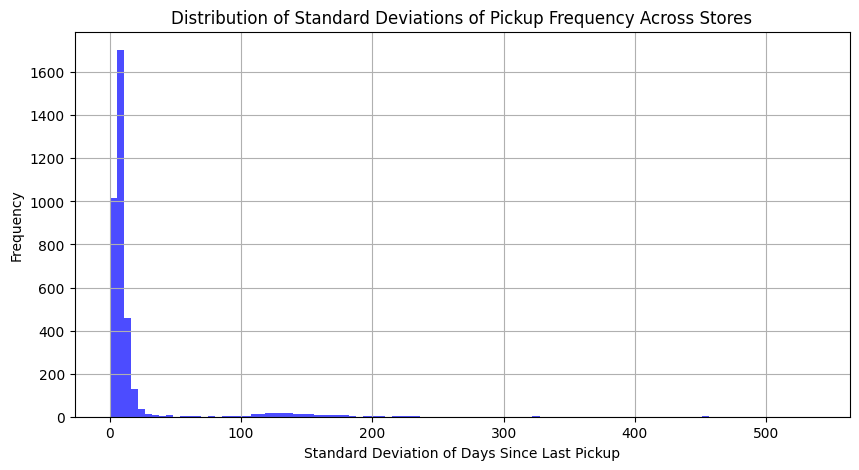

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation, adding 1 to avoid log(0) which is undefined


df['Completed Date'] = pd.to_datetime(df['Completed Date'])

# Sort by 'Location ID' and 'Completed Date'
df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups
df['Days Since Last Pickup'] = df.groupby('Location ID')['Completed Date'].diff().dt.days

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup
pickup_frequency_sd = df.groupby('Location ID')['Days Since Last Pickup'].std()


print(pickup_frequency_sd.quantile(0.95))


## Plot the distribution of standard deviations
plt.figure(figsize=(10, 5))
pickup_frequency_sd.hist(bins=100, alpha=0.7, color='blue')
plt.title('Distribution of Standard Deviations of Pickup Frequency Across Stores')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

125.59968386533167


/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/602085147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/602085147.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenters_df['Days Since Last Pickup'] = supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days


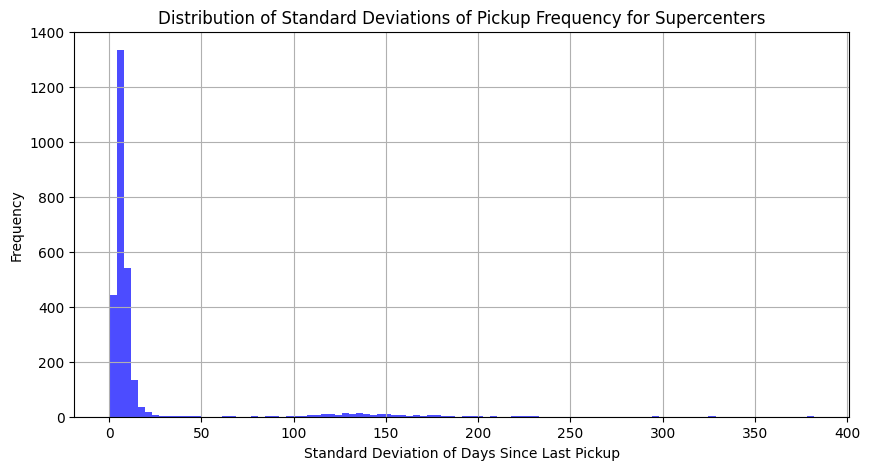

In [128]:
# Filter the dataframe for rows where 'Location Name' contains 'Supercenter'
supercenters_df = df[df['Location Name'].str.contains('Supercenter', na=False)]

# Sort by 'Location ID' and 'Completed Date'
supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups for supercenters
supercenters_df['Days Since Last Pickup'] = supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup for supercenters
pickup_frequency_sd_supercenters = supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()


print(pickup_frequency_sd_supercenters.quantile(0.95))

## Plot the distribution of standard deviations for supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_supercenters.hist(bins=100, alpha=0.7, color='blue')
plt.title('Distribution of Standard Deviations of Pickup Frequency for Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()


In [89]:
# Calculate the mean and standard deviation for 'Days Since Last Pickup'
store_count = df['Location ID'].nunique()
print(store_count)
mean_pickup_sd = pickup_frequency_sd_supercenters.mean()
std_pickup_sd = pickup_frequency_sd_supercenters.std()

# Determine boundaries for 1 standard deviation
lower_bound_1sd = mean_pickup_sd - std_pickup_sd
upper_bound_1sd = mean_pickup_sd + std_pickup_sd

# Determine boundaries for 2 standard deviations
lower_bound_2sd = mean_pickup_sd - 2 * std_pickup_sd
upper_bound_2sd = mean_pickup_sd + 2 * std_pickup_sd

# Identify stores outside 1 standard deviation
outliers_1sd = pickup_frequency_sd_supercenters[(pickup_frequency_sd_supercenters < lower_bound_1sd) | (pickup_frequency_sd_supercenters > upper_bound_1sd)]
store_ids_outliers_1sd = outliers_1sd.index.tolist()

# Identify stores outside 2 standard deviations
outliers_2sd = pickup_frequency_sd_supercenters[(pickup_frequency_sd_supercenters < lower_bound_2sd) | (pickup_frequency_sd_supercenters > upper_bound_2sd)]
store_ids_outliers_2sd = outliers_2sd.index.tolist()

# Print the number of stores cut out at each boundary
print(f"Stores cut out with 1 SD: {len(store_ids_outliers_1sd)}")
print(f"Stores cut out with 2 SD: {len(store_ids_outliers_2sd)}")

# Print the list of store IDs cut out after each boundary set
print(f"Store IDs cut out with 1 SD: {store_ids_outliers_1sd}")
print(f"Store IDs cut out with 2 SD: {store_ids_outliers_2sd}")

3660
Stores cut out with 1 SD: 196
Stores cut out with 2 SD: 189
Store IDs cut out with 1 SD: [143, 146, 248, 282, 299, 321, 322, 383, 395, 399, 491, 493, 508, 526, 537, 571, 586, 589, 600, 602, 608, 651, 701, 720, 744, 765, 791, 812, 849, 870, 927, 963, 972, 999, 1004, 1026, 1044, 1062, 1086, 1139, 1165, 1185, 1198, 1216, 1259, 1275, 1304, 1371, 1378, 1416, 1419, 1433, 1445, 1455, 1459, 1494, 1495, 1519, 1521, 1569, 1665, 1719, 1728, 1733, 1752, 1754, 1800, 1837, 1839, 1894, 1913, 1923, 1927, 1942, 1960, 1962, 1986, 2061, 2063, 2066, 2073, 2079, 2098, 2191, 2192, 2197, 2199, 2239, 2257, 2276, 2316, 2323, 2350, 2354, 2358, 2359, 2426, 2447, 2471, 2506, 2541, 2559, 2599, 2618, 2631, 2649, 2654, 2678, 2691, 2774, 2783, 2786, 2787, 2788, 2819, 2872, 2873, 2912, 2914, 2966, 2967, 2980, 2991, 3056, 3224, 3250, 3251, 3294, 3296, 3297, 3302, 3328, 3390, 3406, 3435, 3436, 3445, 3487, 3502, 3518, 3608, 3640, 3722, 3781, 3783, 3826, 4103, 4111, 4118, 4183, 4230, 4231, 4255, 4285, 4298, 4383, 441

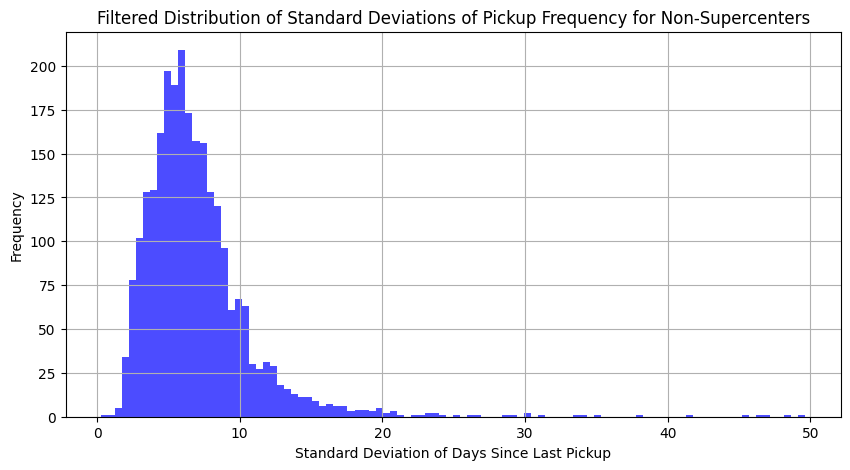

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# List of store IDs to cut out
stores_to_cut = [143, 146, 248, 282, 299, 321, 322, 383, 395, 399, 491, 493, 508, 526, 537, 571, 586, 589, 600, 602, 608, 651, 701, 720, 744, 765, 791, 812, 849, 870, 927, 963, 972, 999, 1004, 1026, 1044, 1062, 1086, 1139, 1165, 1185, 1198, 1216, 1259, 1275, 1304, 1371, 1378, 1416, 1419, 1433, 1445, 1455, 1459, 1494, 1495, 1519, 1521, 1569, 1665, 1719, 1728, 1733, 1752, 1754, 1800, 1837, 1839, 1894, 1913, 1923, 1927, 1942, 1960, 1962, 1986, 2061, 2063, 2066, 2073, 2079, 2098, 2191, 2192, 2197, 2199, 2239, 2257, 2276, 2316, 2323, 2350, 2354, 2358, 2359, 2426, 2447, 2471, 2506, 2541, 2559, 2599, 2618, 2631, 2649, 2654, 2678, 2691, 2774, 2783, 2786, 2787, 2788, 2819, 2872, 2873, 2912, 2914, 2966, 2967, 2980, 2991, 3056, 3224, 3250, 3251, 3294, 3296, 3297, 3302, 3328, 3390, 3406, 3435, 3436, 3445, 3487, 3502, 3518, 3608, 3640, 3722, 3781, 3783, 3826, 4103, 4111, 4118, 4183, 4230, 4231, 4255, 4285, 4298, 4383, 4416, 4417, 4424, 4439, 4450, 4461, 4512, 4526, 4609, 4660, 4681, 4690, 5028, 5029, 5030, 5045, 5066, 5091, 5145, 5146, 5159, 5191, 5203, 5236, 5280, 5309, 5355, 5386, 5387, 5410, 5418, 5472, 5713, 5844, 5893, 5959, 6579, 6931, 7087, 7178]

# Filter out the stores to cut from the non_supercenters_df
filtered_supercenters_df = supercenters_df[~supercenters_df['Location ID'].isin(stores_to_cut)]

# Recalculate the standard deviation of 'Days Since Last Pickup' for the filtered non-supercenters
pickup_frequency_sd_filtered = filtered_supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()

# Plot the distribution of standard deviations for the filtered non-supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_filtered.hist(bins=100, alpha=0.7, color='blue')
plt.title('Filtered Distribution of Standard Deviations of Pickup Frequency for Non-Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

In [91]:
# Convert the list to a DataFrame
store_ids_outliers_1sd_df = pd.DataFrame(store_ids_outliers_1sd, columns=['Location ID'])

32.26112125956019


/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/1049547795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/1049547795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenters_df['Days Since Last Pickup'] = non_supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days


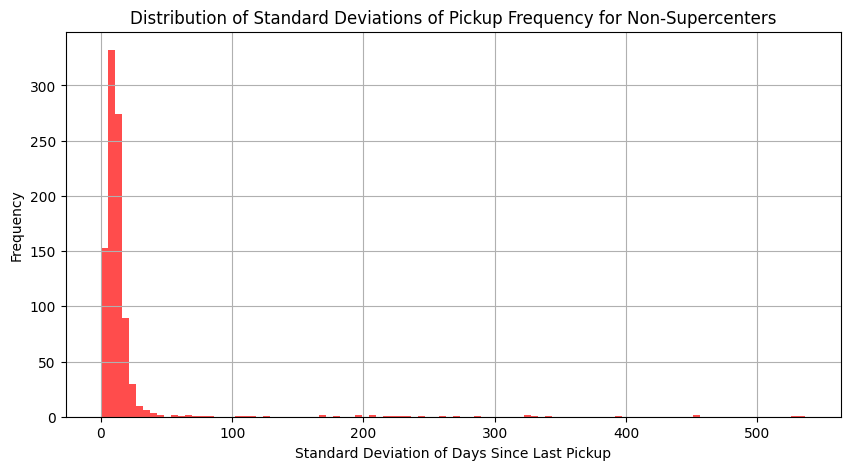

In [92]:
# Filter the dataframe for rows where 'Location Name' does NOT contain 'Supercenter'
non_supercenters_df = df[~df['Location Name'].str.contains('Supercenter', na=False)]


# Sort by 'Location ID' and 'Completed Date'
non_supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups for non-supercenters
non_supercenters_df['Days Since Last Pickup'] = non_supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup for non-supercenters
pickup_frequency_sd_non_supercenters = non_supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()

print(pickup_frequency_sd_non_supercenters.quantile(0.95))

## Plot the distribution of standard deviations for non-supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_non_supercenters.hist(bins=100, alpha=0.7, color='red')
plt.title('Distribution of Standard Deviations of Pickup Frequency for Non-Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

In [93]:

pickup_frequency_sd_non_supercenters = non_supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()

# Calculate the mean and standard deviation for 'Days Since Last Pickup'
store_count = df['Location ID'].nunique()
print(store_count)
mean_pickup_sd = pickup_frequency_sd_non_supercenters.mean()
std_pickup_sd = pickup_frequency_sd_non_supercenters.std()

# Determine boundaries for 1 standard deviation
lower_bound_1sd = mean_pickup_sd - std_pickup_sd
upper_bound_1sd = mean_pickup_sd + std_pickup_sd

# Determine boundaries for 2 standard deviations
lower_bound_2sd = mean_pickup_sd - 2 * std_pickup_sd
upper_bound_2sd = mean_pickup_sd + 2 * std_pickup_sd


# Identify stores outside 1 standard deviation for non-supercenters
outliers_1sd_non_supercenters = pickup_frequency_sd_non_supercenters[
    (pickup_frequency_sd_non_supercenters < lower_bound_1sd) | 
    (pickup_frequency_sd_non_supercenters > upper_bound_1sd)
]
store_ids_outliers_1sd_non_supercenters = outliers_1sd_non_supercenters.index.tolist()

# Identify stores outside 2 standard deviations for non-supercenters
outliers_2sd_non_supercenters = pickup_frequency_sd_non_supercenters[
    (pickup_frequency_sd_non_supercenters < lower_bound_2sd) | 
    (pickup_frequency_sd_non_supercenters > upper_bound_2sd)
]
store_ids_outliers_2sd_non_supercenters = outliers_2sd_non_supercenters.index.tolist()

# Print the number of stores cut out at each boundary for non-supercenters
print(f"Non-Supercenter stores cut out with 1 SD: {len(store_ids_outliers_1sd_non_supercenters)}")
print(f"Non-Supercenter stores cut out with 2 SD: {len(store_ids_outliers_2sd_non_supercenters)}")

# Print the list of store IDs cut out after each boundary set for non-supercenters
print(f"Non-Supercenter Store IDs cut out with 1 SD: {store_ids_outliers_1sd_non_supercenters}")
print(f"Non-Supercenter Store IDs cut out with 2 SD: {store_ids_outliers_2sd_non_supercenters}")

3660
Non-Supercenter stores cut out with 1 SD: 31
Non-Supercenter stores cut out with 2 SD: 25
Non-Supercenter Store IDs cut out with 1 SD: [116, 245, 326, 457, 473, 545, 617, 1013, 1063, 1566, 1629, 1857, 2558, 2718, 2867, 3047, 3149, 3335, 4105, 4177, 4607, 5353, 5452, 5645, 5654, 6100, 8600, 9418, 9420, 9727, 30095]
Non-Supercenter Store IDs cut out with 2 SD: [245, 326, 457, 473, 545, 617, 1013, 1063, 1566, 1629, 1857, 2558, 2718, 2867, 3047, 3149, 3335, 4105, 4177, 4607, 5353, 5452, 5645, 9418, 9420]


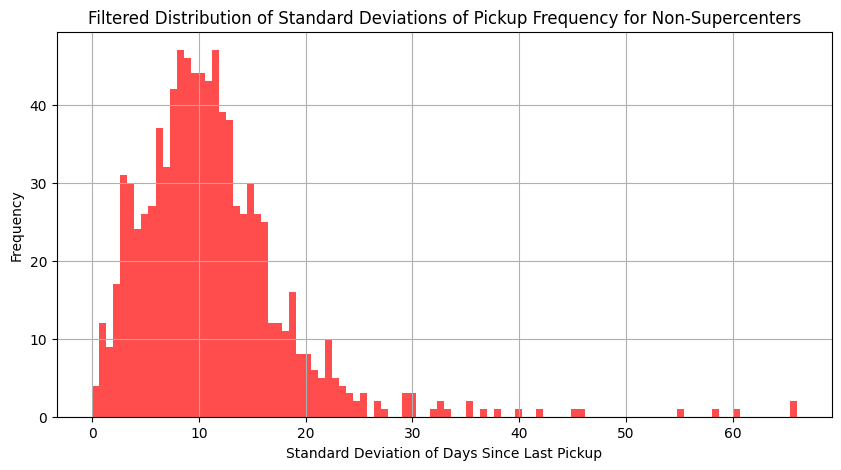

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

# List of store IDs to cut out
stores_to_cut = [116, 245, 326, 457, 473, 545, 617, 1013, 1063, 1566, 1629, 1857, 2558, 2718, 2867, 3047, 3149, 3335, 4105, 4177, 4607, 5353, 5452, 5645, 5654, 6100, 8600, 9418, 9420, 9727, 30095]

# Filter out the stores to cut from the non_supercenters_df
filtered_non_supercenters_df = non_supercenters_df[~non_supercenters_df['Location ID'].isin(stores_to_cut)]

# Recalculate the standard deviation of 'Days Since Last Pickup' for the filtered non-supercenters
pickup_frequency_sd_filtered = filtered_non_supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()

# Plot the distribution of standard deviations for the filtered non-supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_filtered.hist(bins=100, alpha=0.7, color='red')
plt.title('Filtered Distribution of Standard Deviations of Pickup Frequency for Non-Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

In [95]:
# Convert the list to a DataFrame
store_ids_outliers_1sd_non_supercenters = pd.DataFrame(store_ids_outliers_1sd_non_supercenters, columns=['Location ID'])

# Save the DataFrame to a CSV file
store_ids_outliers_1sd_non_supercenters.to_csv('/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/store_ids_outliers_1sd_non_supercenters.csv', index=False)

20.235151787677232


/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/3653398348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/3653398348.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenters_df['Days Since Last Pickup'] = non_supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days


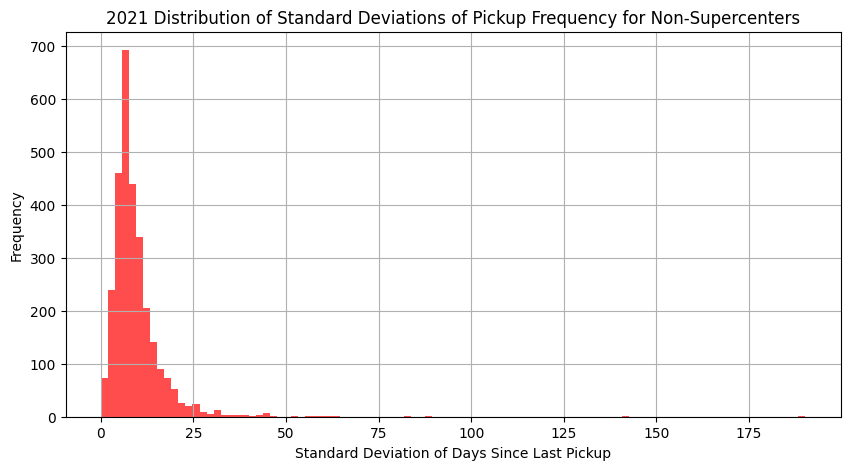

In [96]:
# Filter the dataframe for rows where 'Location Name' does NOT contain 'Supercenter'
non_supercenters_df= df[~df['Location Name'].str.contains('Supercenter', na=False)]
non_supercenters_df = df[df['Completed Date'].dt.year == 2021]


# Sort by 'Location ID' and 'Completed Date'
non_supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups for non-supercenters
non_supercenters_df['Days Since Last Pickup'] = non_supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup for non-supercenters
pickup_frequency_sd_non_supercenters = non_supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()

print(pickup_frequency_sd_non_supercenters.quantile(0.95))

## Plot the distribution of standard deviations for non-supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_non_supercenters.hist(bins=100, alpha=0.7, color='red')
plt.title('2021 Distribution of Standard Deviations of Pickup Frequency for Non-Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/4271625959.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/4271625959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenters_df['Days Since Last Pickup'] = non_supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days


15.081229697503854


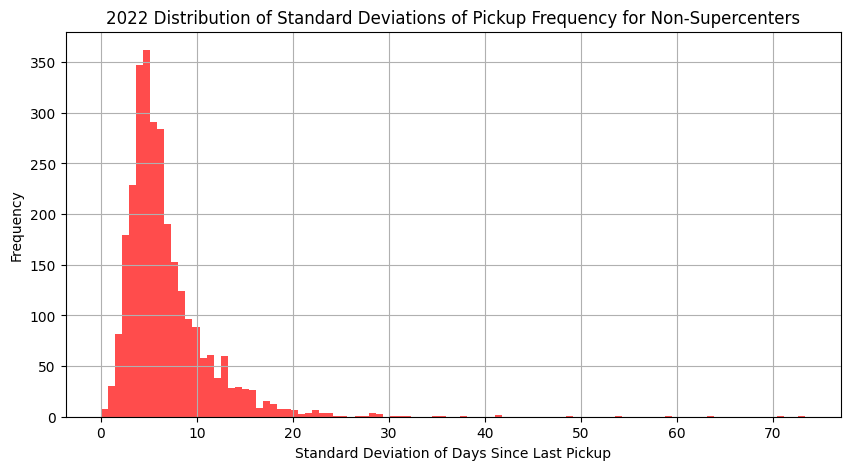

In [97]:
# Filter the dataframe for rows where 'Location Name' does NOT contain 'Supercenter'
non_supercenters_df= df[~df['Location Name'].str.contains('Supercenter', na=False)]
non_supercenters_df = df[df['Completed Date'].dt.year == 2022]


# Sort by 'Location ID' and 'Completed Date'
non_supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups for non-supercenters
non_supercenters_df['Days Since Last Pickup'] = non_supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup for non-supercenters
pickup_frequency_sd_non_supercenters = non_supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()

print(pickup_frequency_sd_non_supercenters.quantile(0.95))

## Plot the distribution of standard deviations for non-supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_non_supercenters.hist(bins=100, alpha=0.7, color='red')
plt.title('2022 Distribution of Standard Deviations of Pickup Frequency for Non-Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/2236708316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/2236708316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenters_df['Days Since Last Pickup'] = non_supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days


16.50527573121667


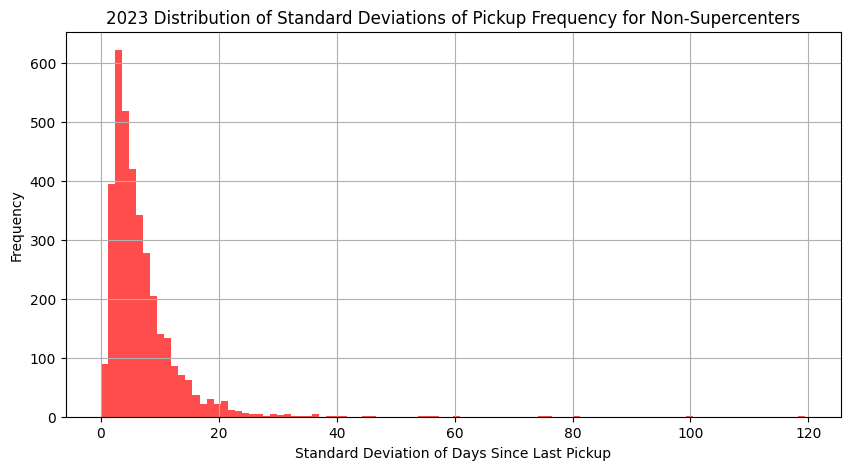

In [98]:
# Filter the dataframe for rows where 'Location Name' does NOT contain 'Supercenter'
non_supercenters_df= df[~df['Location Name'].str.contains('Supercenter', na=False)]
non_supercenters_df = df[df['Completed Date'].dt.year == 2023]


# Sort by 'Location ID' and 'Completed Date'
non_supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups for non-supercenters
non_supercenters_df['Days Since Last Pickup'] = non_supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup for non-supercenters
pickup_frequency_sd_non_supercenters = non_supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()

print(pickup_frequency_sd_non_supercenters.quantile(0.95))

## Plot the distribution of standard deviations for non-supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_non_supercenters.hist(bins=100, alpha=0.7, color='red')
plt.title('2023 Distribution of Standard Deviations of Pickup Frequency for Non-Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

In [99]:
# Define the threshold
threshold = 100

# Count the number of stores with a standard deviation above the threshold
stores_above_threshold = (pickup_frequency_sd > threshold).sum()

print(f"Number of stores with a standard deviation above {threshold}: {stores_above_threshold}")


Number of stores with a standard deviation above 100: 213


# Supercenter Pickup Frequency Per Year

/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/2145760399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)


nan


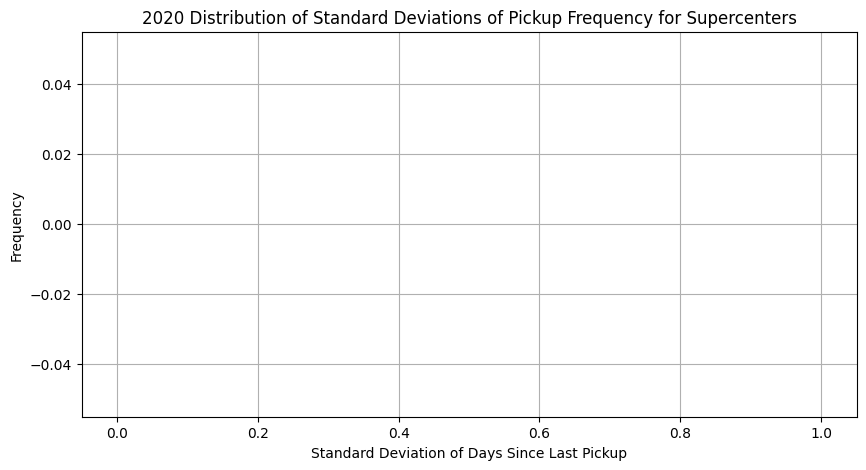

In [100]:
# Filter the dataframe for rows where 'Location Name' contains 'Supercenter'
supercenters_df = df[df['Location Name'].str.contains('Supercenter', na=False)]
supercenters_df = df[df['Completed Date'].dt.year == 2020]

# Sort by 'Location ID' and 'Completed Date'
supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups for supercenters
supercenters_df['Days Since Last Pickup'] = supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup for supercenters
pickup_frequency_sd_supercenters = supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()


print(pickup_frequency_sd_supercenters.quantile(0.95))

## Plot the distribution of standard deviations for supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_supercenters.hist(bins=100, alpha=0.7, color='blue')
plt.title('2020 Distribution of Standard Deviations of Pickup Frequency for Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/3923102410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/3923102410.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenters_df['Days Since Last Pickup'] = supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days


20.235151787677232


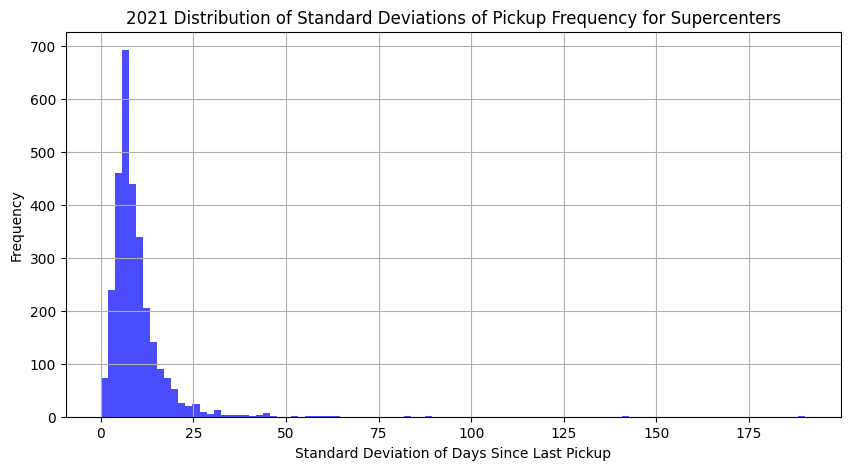

In [101]:
# Filter the dataframe for rows where 'Location Name' contains 'Supercenter'
supercenters_df = df[df['Location Name'].str.contains('Supercenter', na=False)]
supercenters_df = df[df['Completed Date'].dt.year == 2021]

# Sort by 'Location ID' and 'Completed Date'
supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups for supercenters
supercenters_df['Days Since Last Pickup'] = supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup for supercenters
pickup_frequency_sd_supercenters = supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()


print(pickup_frequency_sd_supercenters.quantile(0.95))

## Plot the distribution of standard deviations for supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_supercenters.hist(bins=100, alpha=0.7, color='blue')
plt.title('2021 Distribution of Standard Deviations of Pickup Frequency for Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

15.081229697503854


/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/3083223840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/3083223840.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenters_df['Days Since Last Pickup'] = supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days


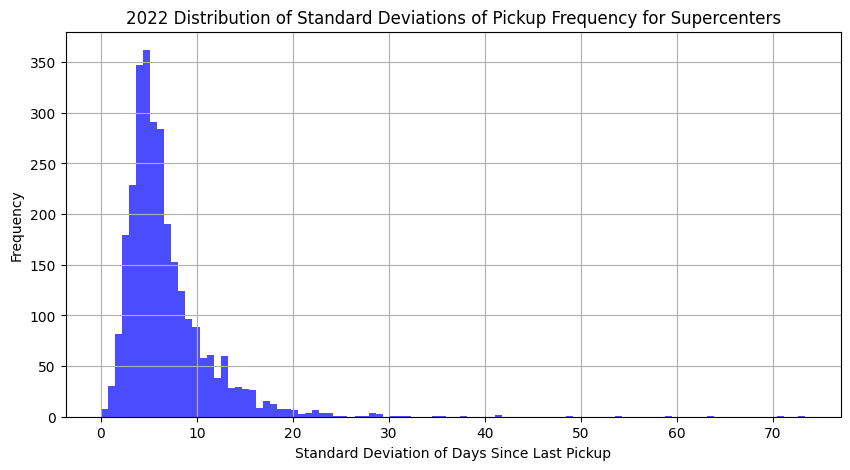

In [102]:
# Filter the dataframe for rows where 'Location Name' contains 'Supercenter'
supercenters_df = df[df['Location Name'].str.contains('Supercenter', na=False)]
supercenters_df = df[df['Completed Date'].dt.year == 2022]

# Sort by 'Location ID' and 'Completed Date'
supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups for supercenters
supercenters_df['Days Since Last Pickup'] = supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup for supercenters
pickup_frequency_sd_supercenters = supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()


print(pickup_frequency_sd_supercenters.quantile(0.95))

## Plot the distribution of standard deviations for supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_supercenters.hist(bins=100, alpha=0.7, color='blue')
plt.title('2022 Distribution of Standard Deviations of Pickup Frequency for Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

16.50527573121667


/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/1251855008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/1251855008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenters_df['Days Since Last Pickup'] = supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days


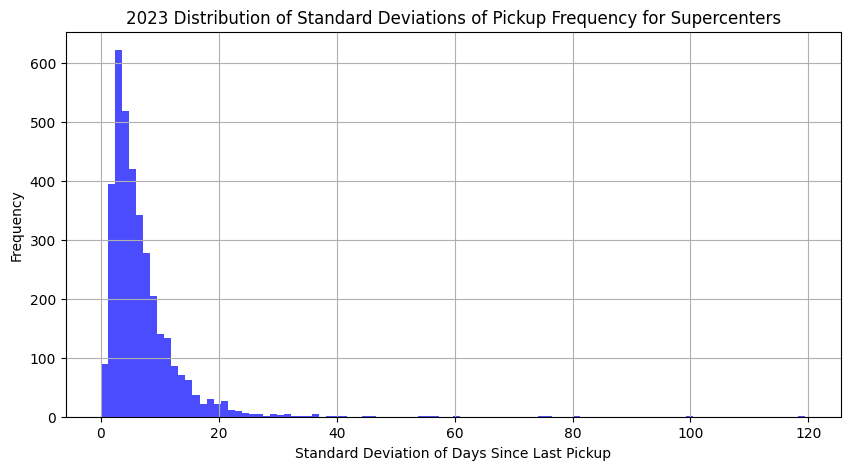

In [103]:
# Filter the dataframe for rows where 'Location Name' contains 'Supercenter'
supercenters_df = df[df['Location Name'].str.contains('Supercenter', na=False)]
supercenters_df = df[df['Completed Date'].dt.year == 2023]

# Sort by 'Location ID' and 'Completed Date'
supercenters_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups for supercenters
supercenters_df['Days Since Last Pickup'] = supercenters_df.groupby('Location ID')['Completed Date'].diff().dt.days

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup for supercenters
pickup_frequency_sd_supercenters = supercenters_df.groupby('Location ID')['Days Since Last Pickup'].std()


print(pickup_frequency_sd_supercenters.quantile(0.95))

## Plot the distribution of standard deviations for supercenters
plt.figure(figsize=(10, 5))
pickup_frequency_sd_supercenters.hist(bins=100, alpha=0.7, color='blue')
plt.title('2023 Distribution of Standard Deviations of Pickup Frequency for Supercenters')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()

SD of Tonnage for each store:
Location ID
1        2.397895
3        3.071989
7        2.456910
9        1.813031
10       2.597924
           ...   
9836     3.495861
9930     5.034722
30026    2.996033
30095    5.065434
30099    1.829927
Name: Tonnage, Length: 3660, dtype: float64
3.9854307419337616


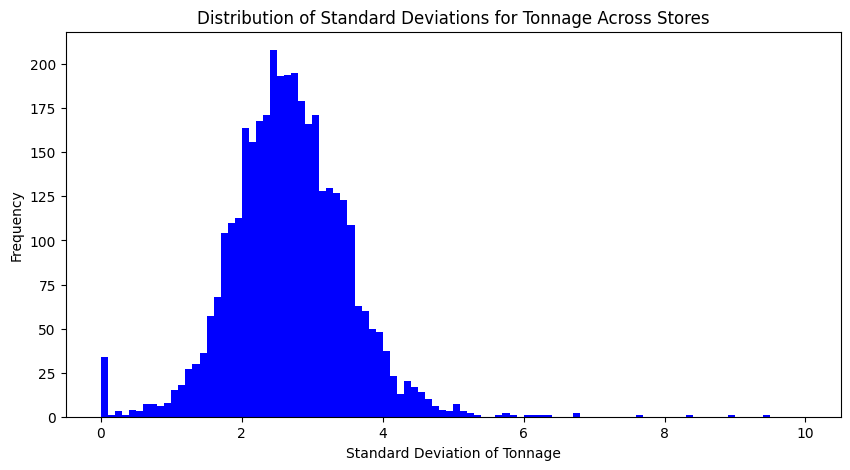

In [104]:
df['Completed Date'] = pd.to_datetime(df['Completed Date'])

# Group by 'Location ID' and calculate SD for Tonnage
tonnage_sd = df.groupby('Location ID')['Tonnage'].std()


print("SD of Tonnage for each store:")
print(tonnage_sd)


print(tonnage_sd.quantile(0.95))


### Step 2: Analyze Distribution

# Distribution of SDs for tonnage
plt.figure(figsize=(10, 5))
plt.hist(tonnage_sd.dropna(), bins=100, color='blue', label='Tonnage SD', range=(0, 10))  # limiting range to (0, 200)
plt.title('Distribution of Standard Deviations for Tonnage Across Stores')
plt.xlabel('Standard Deviation of Tonnage')
plt.ylabel('Frequency')
plt.show()



SD of Tonnage for Supercenters:
Location ID
1       2.397895
3       3.071989
7       2.456910
9       1.813031
10      2.597924
          ...   
7301    2.238076
7324    3.565256
7326    2.091924
8331    3.617320
8930    4.052087
Name: Tonnage, Length: 2744, dtype: float64
3.897714882877847


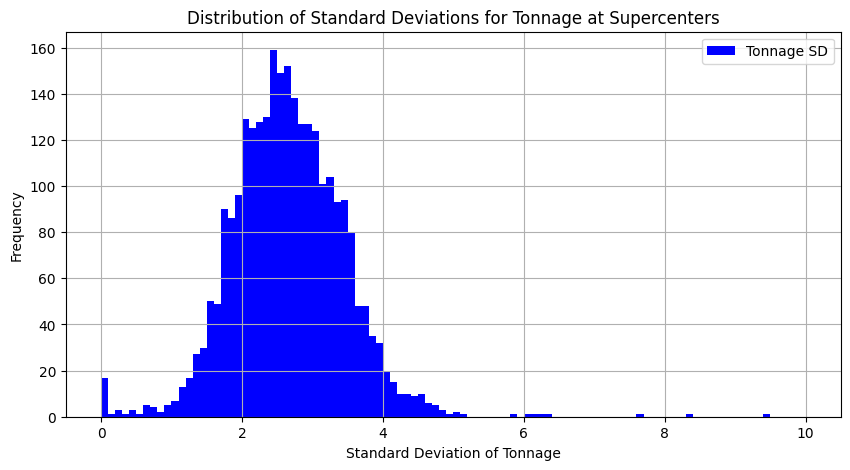

In [105]:
# Filter the dataframe for rows where 'Location Name' contains 'Supercenter'
supercenters_df = df[df['Location Name'].str.contains('Supercenter', na=False)]

# Group by 'Location ID' and calculate SD for Tonnage for supercenters
tonnage_sd_supercenters = supercenters_df.groupby('Location ID')['Tonnage'].std()

print("SD of Tonnage for Supercenters:")
print(tonnage_sd_supercenters)
print(tonnage_sd_supercenters.quantile(0.95))

### Step 2: Analyze Distribution

# Distribution of SDs for tonnage for supercenters
plt.figure(figsize=(10, 5))
tonnage_sd_supercenters.hist(bins=100, color='blue', label='Tonnage SD', range=(0, 10))  # limiting range to (0, 10)
plt.title('Distribution of Standard Deviations for Tonnage at Supercenters')
plt.xlabel('Standard Deviation of Tonnage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

SD of Tonnage for Non-Supercenters:
Location ID
32       2.513968
57            NaN
60       1.022073
116      0.000000
176      2.851287
           ...   
9836     3.495861
9930     5.034722
30026    2.996033
30095    5.065434
30099    1.829927
Name: Tonnage, Length: 985, dtype: float64
4.301130084059304


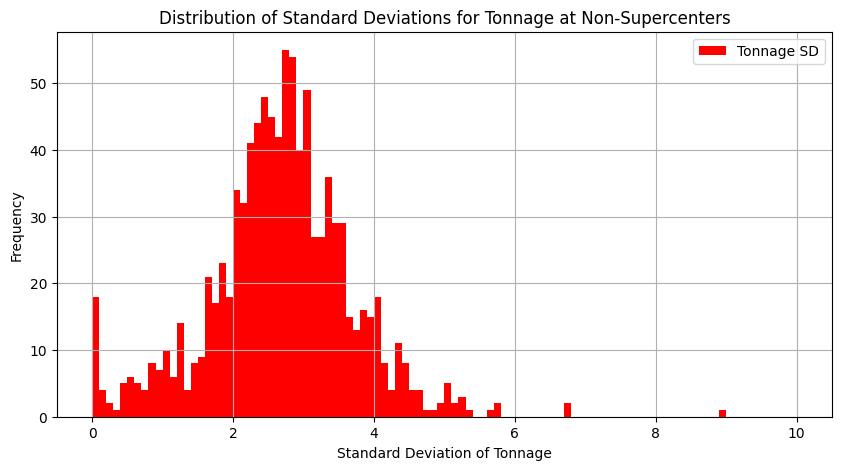

In [106]:
# Filter the dataframe for rows where 'Location Name' does NOT contain 'Supercenter'
non_supercenters_df = df[~df['Location Name'].str.contains('Supercenter', na=False)]

# Group by 'Location ID' and calculate SD for Tonnage for non-supercenters
tonnage_sd_non_supercenters = non_supercenters_df.groupby('Location ID')['Tonnage'].std()

print("SD of Tonnage for Non-Supercenters:")
print(tonnage_sd_non_supercenters)
print(tonnage_sd_non_supercenters.quantile(0.95))

### Step 2: Analyze Distribution

# Distribution of SDs for tonnage for non-supercenters
plt.figure(figsize=(10, 5))
tonnage_sd_non_supercenters.hist(bins=100, color='red', label='Tonnage SD', range=(0, 10))  # limiting range to (0, 10)
plt.title('Distribution of Standard Deviations for Tonnage at Non-Supercenters')
plt.xlabel('Standard Deviation of Tonnage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [107]:
# Assuming tonnage_sd_supercenters and tonnage_sd_non_supercenters are already calculated
# If not, you would need to calculate them similar to how pickup_frequency_sd_supercenters was calculated

# Calculate the mean and standard deviation for 'Tonnage' for supercenters
mean_tonnage_sd_supercenters = tonnage_sd_supercenters.mean()
std_tonnage_sd_supercenters = tonnage_sd_supercenters.std()

# Determine boundaries for 1 standard deviation for supercenters
lower_bound_1sd_supercenters = mean_tonnage_sd_supercenters - std_tonnage_sd_supercenters
upper_bound_1sd_supercenters = mean_tonnage_sd_supercenters + std_tonnage_sd_supercenters

# Determine boundaries for 2 standard deviations for supercenters
lower_bound_2sd_supercenters = mean_tonnage_sd_supercenters - 2 * std_tonnage_sd_supercenters
upper_bound_2sd_supercenters = mean_tonnage_sd_supercenters + 2 * std_tonnage_sd_supercenters

# Identify stores outside 1 standard deviation for supercenters
outliers_1sd_supercenters = tonnage_sd_supercenters[
    (tonnage_sd_supercenters < lower_bound_1sd_supercenters) | 
    (tonnage_sd_supercenters > upper_bound_1sd_supercenters)
]
store_ids_outliers_1sd_supercenters = outliers_1sd_supercenters.index.tolist()

# Identify stores outside 2 standard deviations for supercenters
outliers_2sd_supercenters = tonnage_sd_supercenters[
    (tonnage_sd_supercenters < lower_bound_2sd_supercenters) | 
    (tonnage_sd_supercenters > upper_bound_2sd_supercenters)
]
store_ids_outliers_2sd_supercenters = outliers_2sd_supercenters.index.tolist()
# Print the results for supercenters
print(f"Supercenter stores cut out with 1 SD: {len(store_ids_outliers_1sd_supercenters)}")
print(f"Supercenter stores cut out with 2 SD: {len(store_ids_outliers_2sd_supercenters)}")
print(f"Supercenter Store IDs cut out with 1 SD: {store_ids_outliers_1sd_supercenters}")
print(f"Supercenter Store IDs cut out with 2 SD: {store_ids_outliers_2sd_supercenters}")

Supercenter stores cut out with 1 SD: 55
Supercenter stores cut out with 2 SD: 6
Supercenter Store IDs cut out with 1 SD: [36, 146, 158, 194, 226, 281, 285, 310, 523, 586, 675, 707, 827, 865, 886, 917, 918, 1004, 1044, 1287, 1349, 1359, 1572, 1748, 1995, 2025, 2270, 2348, 2439, 2617, 2619, 2688, 2734, 2781, 2831, 3269, 3367, 3764, 3868, 4244, 4247, 4350, 4474, 4681, 5003, 5218, 5246, 5385, 5687, 5727, 5872, 6467, 6998, 7087, 7178]
Supercenter Store IDs cut out with 2 SD: [865, 1287, 2270, 3367, 5246, 5872]


In [108]:
mean_tonnage_sd_non_supercenters = tonnage_sd_non_supercenters.mean()
std_tonnage_sd_non_supercenters = tonnage_sd_non_supercenters.std()

lower_bound_1sd_non_supercenters = mean_tonnage_sd_non_supercenters - std_tonnage_sd_non_supercenters
upper_bound_1sd_non_supercenters = mean_tonnage_sd_non_supercenters + std_tonnage_sd_non_supercenters

lower_bound_2sd_non_supercenters = mean_tonnage_sd_non_supercenters - 2 * std_tonnage_sd_non_supercenters
upper_bound_2sd_non_supercenters = mean_tonnage_sd_non_supercenters + 2 * std_tonnage_sd_non_supercenters

outliers_1sd_non_supercenters = tonnage_sd_non_supercenters[
    (tonnage_sd_non_supercenters < lower_bound_1sd_non_supercenters) | 
    (tonnage_sd_non_supercenters > upper_bound_1sd_non_supercenters)
]
store_ids_outliers_1sd_non_supercenters = outliers_1sd_non_supercenters.index.tolist()

outliers_2sd_non_supercenters = tonnage_sd_non_supercenters[
    (tonnage_sd_non_supercenters < lower_bound_2sd_non_supercenters) | 
    (tonnage_sd_non_supercenters > upper_bound_2sd_non_supercenters)
]
store_ids_outliers_2sd_non_supercenters = outliers_2sd_non_supercenters.index.tolist()

# Print the results for non-supercenters
print(f"Non-Supercenter stores cut out with 1 SD: {len(store_ids_outliers_1sd_supercenters)}")
print(f"Non-Supercenter stores cut out with 2 SD: {len(store_ids_outliers_2sd_non_supercenters)}")
print(f"Non-Supercenter Store IDs cut out with 1 SD: {store_ids_outliers_1sd_non_supercenters}")
print(f"Non-Supercenter Store IDs cut out with 2 SD: {store_ids_outliers_2sd_non_supercenters}")

Non-Supercenter stores cut out with 1 SD: 55
Non-Supercenter stores cut out with 2 SD: 51
Non-Supercenter Store IDs cut out with 1 SD: [60, 116, 241, 245, 274, 283, 326, 411, 422, 473, 480, 545, 550, 581, 603, 609, 617, 633, 636, 646, 693, 717, 830, 895, 898, 920, 957, 996, 1013, 1063, 1078, 1325, 1629, 1807, 1886, 1906, 1919, 2020, 2280, 2319, 2326, 2328, 2744, 2773, 2801, 2835, 2866, 2870, 2875, 2876, 2979, 2984, 3043, 3047, 3110, 3155, 3156, 3157, 3322, 3327, 3335, 3456, 3637, 3638, 3653, 3654, 3661, 3703, 3713, 3746, 3752, 3845, 3885, 3899, 4054, 4057, 4114, 4128, 4142, 4157, 4193, 4197, 4211, 4220, 4244, 4257, 4286, 4323, 4405, 4432, 4464, 4468, 4469, 4504, 4511, 4524, 4528, 4530, 4531, 4565, 4605, 4606, 4607, 4659, 4669, 4671, 4672, 4673, 4677, 4692, 4728, 4747, 4992, 5021, 5060, 5098, 5100, 5108, 5115, 5125, 5127, 5135, 5149, 5150, 5157, 5279, 5290, 5308, 5313, 5327, 5349, 5352, 5371, 5372, 5393, 5397, 5399, 5402, 5403, 5404, 5432, 5452, 5463, 5485, 5486, 5614, 5617, 5625, 5645,

In [109]:
store_ids_outliers_1sd_supercenters_df = pd.DataFrame(store_ids_outliers_1sd_supercenters, columns=['Location ID'])

# Save the DataFrame to a CSV file
store_ids_outliers_1sd_supercenters_df.to_csv('/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/tonnage_outliers_1sd_supercenters_df.csv', index=False)

In [110]:
store_ids_outliers_1sd_non_supercenters_df = pd.DataFrame(store_ids_outliers_1sd_non_supercenters, columns=['Location ID'])

# Save the DataFrame to a CSV file
store_ids_outliers_1sd_non_supercenters_df.to_csv('/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/tonnage_outliers_1sd_non_supercenters_df.csv', index=False)

In [111]:
# Replace '5' with the actual Location ID of the store you're interested in
store_id = 12
store_data = df[df['Location ID'] == store_id]

# Calculate mean and standard deviation
mean_tonnage = store_data['Tonnage'].mean()
std_tonnage = store_data['Tonnage'].std()

# Calculate one standard deviation from the mean
one_std_above = mean_tonnage + std_tonnage
one_std_below = mean_tonnage - std_tonnage

print(f"For store {store_id}, the mean tonnage is: {mean_tonnage}")
print(f"One standard deviation above the mean is: {one_std_above}")
print(f"One standard deviation below the mean is: {one_std_below}")

For store 12, the mean tonnage is: 7.269464285714286
One standard deviation above the mean is: 9.711314865345798
One standard deviation below the mean is: 4.827613706082774


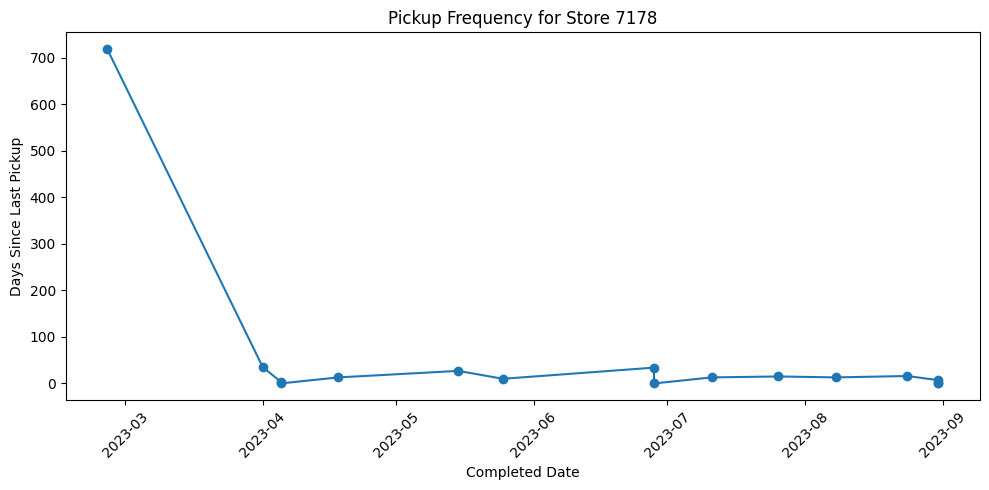

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Completed Date' is a datetime for plotting
df['Completed Date'] = pd.to_datetime(df['Completed Date'])

# Replace 'store_id_value' with the actual Location ID of the store you're interested in
store_id_value = 7178
store_data = df[df['Location ID'] == store_id_value]

# Plot the 'Days Since Last Pickup' for the store
plt.figure(figsize=(10, 5))
plt.plot(store_data['Completed Date'], store_data['Days Since Last Pickup'], marker='o')
plt.title(f'Pickup Frequency for Store {store_id_value}')
plt.xlabel('Completed Date')
plt.ylabel('Days Since Last Pickup')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


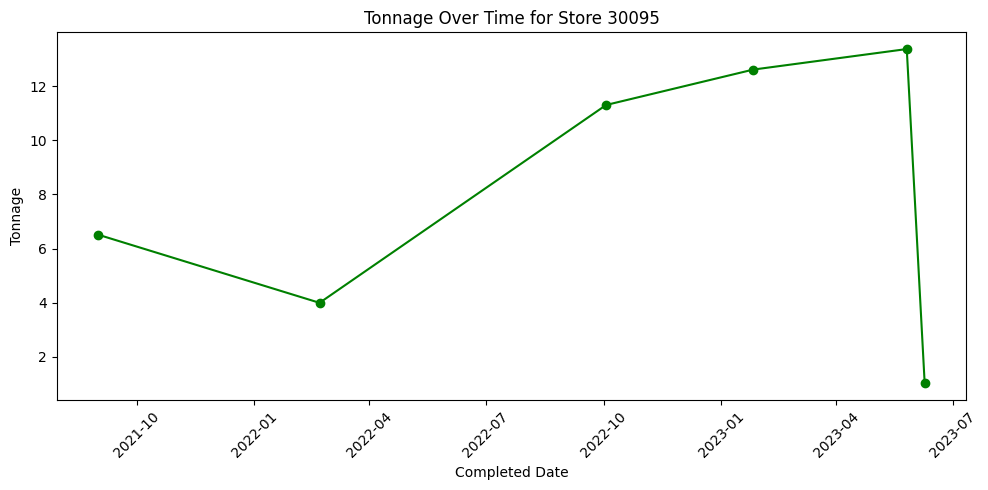

In [113]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Completed Date' is a datetime for plotting
df['Completed Date'] = pd.to_datetime(df['Completed Date'])

# Replace 'store_id_value' with the actual Location ID of the store you're interested in
store_id_value = 30095
store_data = df[df['Location ID'] == store_id_value]

# Plot the 'Tonnage' for the store
plt.figure(figsize=(10, 5))
plt.plot(store_data['Completed Date'], store_data['Tonnage'], marker='o', color='green')
plt.title(f'Tonnage Over Time for Store {store_id_value}')
plt.xlabel('Completed Date')
plt.ylabel('Tonnage')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

# Extra EDA


In [114]:
import pandas as pd

# Read the first CSV file into a DataFrame
df1 = pd.read_csv('/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/store_ids_outliers_1sd_non_supercenters.csv')

# Read the second CSV file into a DataFrame
df2 = pd.read_csv('/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/store_ids_outliers_1sd.csv')

# Assuming 'Store ID' is the column with the store identifiers
unique_stores_df1 = df1['Location ID'].unique()
unique_stores_df2 = df2['Location ID'].unique()

# Combine the unique store IDs from both DataFrames
all_unique_stores = pd.Series(np.concatenate((unique_stores_df1, unique_stores_df2))).unique()

# Count the total number of unique stores
total_unique_stores = len(all_unique_stores)

print(f"Total number of unique stores in both CSVs: {total_unique_stores}")

Total number of unique stores in both CSVs: 227


In [115]:
import pandas as pd
import numpy as np

# Paths to the CSV files
csv_paths = [
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/store_ids_outliers_1sd_non_supercenters.csv',
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/store_ids_outliers_1sd.csv',
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/tonnage_outliers_1sd_supercenters_df.csv',
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/tonnage_outliers_1sd_non_supercenters_df.csv'
]

# Column name for store identifiers
store_id_column = 'Location ID'

# Read each CSV file and collect unique store IDs
all_unique_stores = []
for csv_path in csv_paths:
    df_store_id = pd.read_csv(csv_path)
    unique_stores = df_store_id[store_id_column].unique()
    all_unique_stores.extend(unique_stores)

# Deduplicate the combined store IDs
all_unique_stores = pd.Series(all_unique_stores).unique()

# Count the total number of unique stores
total_unique_stores = len(all_unique_stores)

print(f"Total number of unique stores across all CSVs: {total_unique_stores}")

Total number of unique stores across all CSVs: 481


In [116]:
import pandas as pd

# Paths to the CSV files
csv_paths = [
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/store_ids_outliers_1sd.csv',
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/tonnage_outliers_1sd_supercenters_df.csv',
]

# Column name for store identifiers
store_id_column = 'Location ID'

# Initialize an empty DataFrame for the common stores
common_stores = pd.read_csv(csv_paths[0])[[store_id_column]]

# Find the common stores across all CSVs
for csv_path in csv_paths[1:]:
    df_3 = pd.read_csv(csv_path)
    common_stores = pd.merge(common_stores, df_3[[store_id_column]], on=store_id_column, how='inner')

# Print out the store IDs present in all CSVs
print(common_stores)

   Location ID
0          146
1          586
2         1004
3         1044
4         4681
5         7087
6         7178


In [117]:
import pandas as pd

# Paths to the CSV files
csv_paths = [
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/store_ids_outliers_1sd_non_supercenters.csv',
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/store_ids_outliers_1sd.csv',
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/tonnage_outliers_1sd_supercenters_df.csv',
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/tonnage_outliers_1sd_non_supercenters_df.csv'
]

# Column name for store identifiers
store_id_column = 'Location ID'

# Read each CSV file and collect unique store IDs
all_store_ids = set()
for csv_path in csv_paths:
    df = pd.read_csv(csv_path)
    unique_store_ids = set(df[store_id_column].unique())
    all_store_ids.update(unique_store_ids)

# Read the target CSV file
target_df = pd.read_csv('/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/0221_0923_no_franchise_data.csv')

# Filter out the rows with store IDs that appear in any of the four CSVs
filtered_df = target_df[~target_df[store_id_column].isin(all_store_ids)]

# Create a new DataFrame with only the 'Location ID' column
location_ids_df = filtered_df[[store_id_column]].drop_duplicates()

# Save the new DataFrame to a CSV file
location_ids_df.to_csv('/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/mark_good_stores.csv', index=False)


/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/1829920911.py:22: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  target_df = pd.read_csv('/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/0221_0923_no_franchise_data.csv')


In [118]:
import pandas as pd

# Paths to the CSV files
csv_paths = [
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/store_ids_outliers_1sd_non_supercenters.csv',
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/store_ids_outliers_1sd.csv',
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/tonnage_outliers_1sd_supercenters_df.csv',
    '/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/tonnage_outliers_1sd_non_supercenters_df.csv'
]

# Column name for store identifiers
store_id_column = 'Location ID'

# Initialize an empty set to store unique store IDs
all_store_ids = set()

# Read each CSV file and collect unique store IDs
for csv_path in csv_paths:
    df = pd.read_csv(csv_path)
    unique_store_ids = set(df[store_id_column].unique())
    all_store_ids.update(unique_store_ids)

# Convert the set to a list and sort it
all_store_ids_list = sorted(list(all_store_ids))

# Convert the list to a DataFrame
all_store_ids_df = pd.DataFrame(all_store_ids_list, columns=[store_id_column])

# Save the DataFrame to a CSV file
all_store_ids_df.to_csv('/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/mark_badstores.csv', index=False)

In [121]:
df.head()

,Location ID
0,60
1,116
2,241
3,245
4,274


/var/folders/xk/vtbll1l13rx3vyfrm7k9h0lr0000gn/T/ipykernel_7167/3086941181.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/0221_0923_no_franchise_data.csv")


16.20738046840038


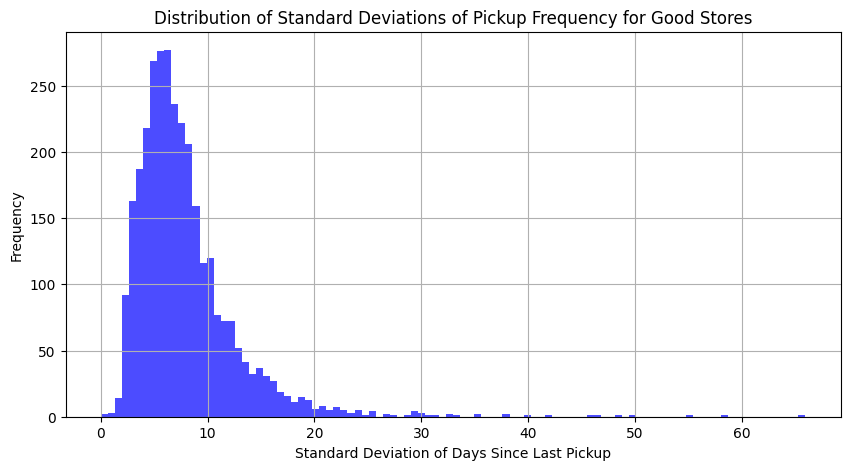

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/0221_0923_no_franchise_data.csv")
df = df.drop(columns=["Unnamed: 0"])

# Load the DataFrame of good stores
good_stores_df = pd.read_csv('/Users/marknour/Desktop/walmart/newwalmart/dtxwalmart/mark_good_stores.csv')

# Ensure 'Completed Date' is a datetime for plotting
df['Completed Date'] = pd.to_datetime(df['Completed Date'])

# Sort by 'Location ID' and 'Completed Date'
df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)

# Calculate the difference in days between consecutive pickups
df['Days Since Last Pickup'] = df.groupby('Location ID')['Completed Date'].diff().dt.days

# Filter the main DataFrame to only include the good stores
filtered_df = df[df['Location ID'].isin(good_stores_df['Location ID'])]

# Group by 'Location ID' and calculate the standard deviation of the days since last pickup for the good stores
pickup_frequency_sd_good_stores = filtered_df.groupby('Location ID')['Days Since Last Pickup'].std()

# Print the 95th percentile of the standard deviation for the good stores
print(pickup_frequency_sd_good_stores.quantile(0.95))

# Plot the distribution of standard deviations for the good stores
plt.figure(figsize=(10, 5))
pickup_frequency_sd_good_stores.hist(bins=100, alpha=0.7, color='blue')
plt.title('Distribution of Standard Deviations of Pickup Frequency for Good Stores')
plt.xlabel('Standard Deviation of Days Since Last Pickup')
plt.ylabel('Frequency')
plt.show()